<a href="https://colab.research.google.com/github/Aswinibishoyi/3.Data-Preprocessing/blob/master/Quantile_Transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quantile Transforms

In [0]:
# demonstration of the quantile transform
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

Sonar Dataset

(208, 61)
               0           1           2   ...          57          58          59
count  208.000000  208.000000  208.000000  ...  208.000000  208.000000  208.000000
mean     0.029164    0.038437    0.043832  ...    0.007949    0.007941    0.006507
std      0.022991    0.032960    0.038428  ...    0.006470    0.006181    0.005031
min      0.001500    0.000600    0.001500  ...    0.000300    0.000100    0.000600
25%      0.013350    0.016450    0.018950  ...    0.003600    0.003675    0.003100
50%      0.022800    0.030800    0.034300  ...    0.005800    0.006400    0.005300
75%      0.035550    0.047950    0.057950  ...    0.010350    0.010325    0.008525
max      0.137100    0.233900    0.305900  ...    0.044000    0.036400    0.043900

[8 rows x 60 columns]


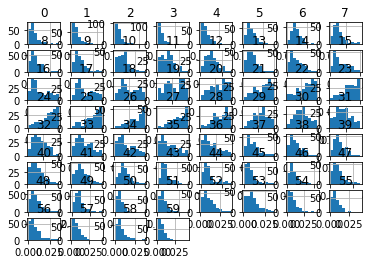

In [0]:
# load and summarize the sonar dataset
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

In [0]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


Normal Quantile Transform

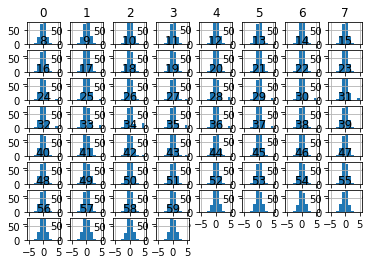

In [0]:
# visualize a normal quantile transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
dataset.hist()
pyplot.show()

In [0]:
# evaluate knn on the sonar dataset with normal quantile transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.817 (0.087)


Uniform Quantile Transform

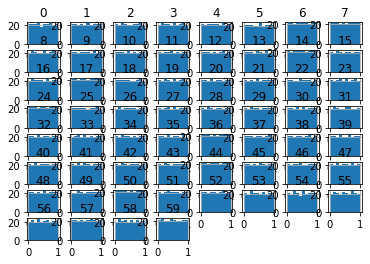

In [0]:
# visualize a uniform quantile transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a uniform quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
dataset.hist()
pyplot.show()

In [0]:
# evaluate knn on the sonar dataset with uniform quantile transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.845 (0.074)


>1 0.466 (0.016)
>2 0.813 (0.085)
>3 0.840 (0.080)
>4 0.854 (0.075)
>5 0.848 (0.072)
>6 0.851 (0.071)
>7 0.845 (0.071)
>8 0.848 (0.066)
>9 0.848 (0.071)
>10 0.843 (0.074)
>11 0.838 (0.069)
>12 0.838 (0.069)
>13 0.846 (0.071)
>14 0.842 (0.071)
>15 0.845 (0.068)
>16 0.841 (0.074)
>17 0.846 (0.071)
>18 0.842 (0.075)
>19 0.840 (0.075)
>20 0.838 (0.076)
>21 0.843 (0.071)
>22 0.845 (0.073)
>23 0.843 (0.068)
>24 0.845 (0.072)
>25 0.840 (0.077)
>26 0.843 (0.072)
>27 0.842 (0.073)
>28 0.840 (0.076)
>29 0.845 (0.072)
>30 0.840 (0.075)
>31 0.838 (0.076)
>32 0.842 (0.075)
>33 0.843 (0.074)
>34 0.843 (0.075)
>35 0.842 (0.075)
>36 0.843 (0.073)
>37 0.842 (0.075)
>38 0.843 (0.075)
>39 0.840 (0.076)
>40 0.845 (0.074)
>41 0.841 (0.072)
>42 0.842 (0.075)
>43 0.842 (0.074)
>44 0.843 (0.074)
>45 0.840 (0.076)
>46 0.842 (0.075)
>47 0.845 (0.072)
>48 0.842 (0.073)
>49 0.840 (0.073)
>50 0.842 (0.072)
>51 0.842 (0.075)
>52 0.845 (0.071)
>53 0.843 (0.075)
>54 0.845 (0.074)
>55 0.838 (0.076)
>56 0.846 (0.073)
>

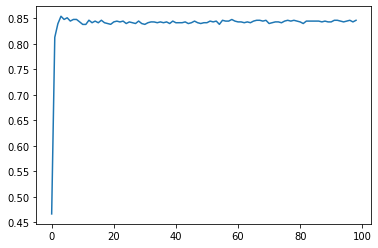

In [0]:
# explore number of quantiles on classification accuracy
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
	# load dataset
	url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
	dataset = read_csv(url, header=None)
	data = dataset.values
	# separate into input and output columns
	X, y = data[:, :-1], data[:, -1]
	# ensure inputs are floats and output is an integer label
	X = X.astype('float32')
	y = LabelEncoder().fit_transform(y.astype('str'))
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,100):
		# define the pipeline
		trans = QuantileTransformer(n_quantiles=i, output_distribution='uniform')
		model = KNeighborsClassifier()
		models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results = list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(mean(scores))
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.plot(results)
pyplot.show()